In [52]:
import numpy as np
import sklearn.decomposition
from sklearn import tree
sigma1 = np.array([[5,0],[0,2]])
sigma2 = np.array([[.25,.25],[.25,1]])
x = np.random.multivariate_normal([-3,0],sigma1,size = 1000)
x = np.append(x,np.random.multivariate_normal([0,0],sigma2,size = 1000),axis=0)
y = np.repeat([0,1],1000)
x_test = np.random.multivariate_normal([-3,0],sigma1,size = 2000)
x_test = np.append(x_test,np.random.multivariate_normal([0,0],sigma2,size = 2000),axis=0)
y_test = np.repeat([0,1],2000)

In [38]:
blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=1000)
blob_tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

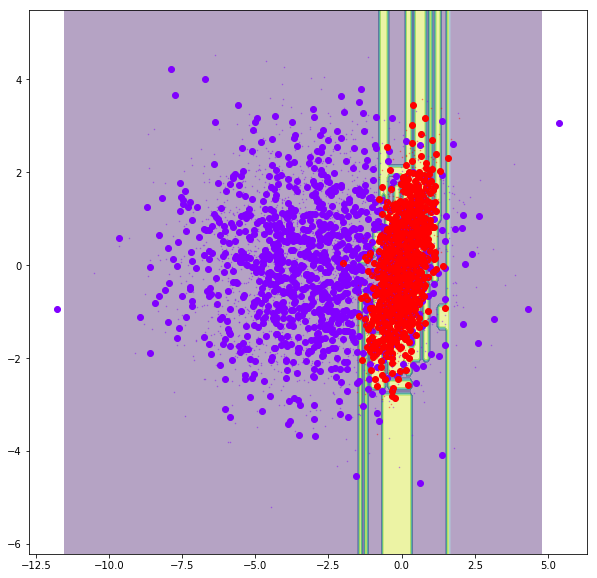

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
m = np.unique(y)
color = plt.cm.rainbow(m / (np.unique(m).size-1))

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(10,10))
axarr.contourf(xx, yy, Z, alpha=0.4)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    plt.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count])
    count+=1
count = 0
for i in np.unique(y_test):
    plt.scatter(x_test[y_test ==i,0],
                x_test[y_test ==i,1],
                c = color[count],
               marker=".",alpha=.5,s=1)
    count+=1

In [4]:
#test_y = data[1000:,0:2]
#test_x = data[1000:,3:]
#test_x = x_PCA.transform(test_x)
np.sum(blob_tree.predict(x_test) == y_test)/x_test.shape[0]

0.876

In [5]:
bootstraps = {}
for i in np.arange(1000):
    index = np.random.randint(0,x.shape[0],size = x.shape[0])
    blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=1000).fit(x[index,0:],
                                                                                      y[index])
    bootstraps[i] = blob_tree

In [6]:
from scipy.stats import mode
pred = np.zeros((1000,x_test.shape[0]))
for i in np.arange(1000):
    pred[i] = bootstraps[i].predict(x_test)
pred = (mode(pred,axis = 0)[0]).ravel()
np.sum(pred == y_test)/x_test.shape[0]

0.91325000000000001

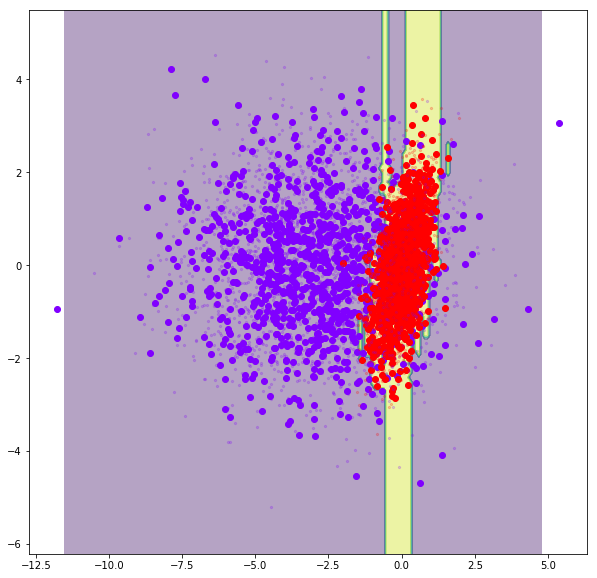

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
m = np.unique(y)
color = plt.cm.rainbow(m / (np.unique(m).size-1))

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
pred = np.zeros((1000,np.c_[xx.ravel(), yy.ravel()].shape[0]))
for i in np.arange(1000):
    pred[i] = bootstraps[i].predict(np.c_[xx.ravel(), yy.ravel()])
Z = (mode(pred,axis = 0)[0]).ravel()
#np.sum(pred == y_test)/x_test.shape[0]
#Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(10,10))
axarr.contourf(xx, yy, Z, alpha=0.4)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    plt.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count])
    count+=1
count = 0
for i in np.unique(y_test):
    plt.scatter(x_test[y_test ==i,0],
                x_test[y_test ==i,1],
                c = color[count],
               marker="o",alpha=.2,s=5)
    count+=1

In [53]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [31]:
index = np.random.permutation(np.arange(mnist.data.shape[0]))
train = mnist.data[index[0:60000]]
train_labels = mnist.target[index[0:60000]]
test = mnist.data[index[60000:]]
test_labels = mnist.target[index[60000:]]

In [256]:
blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
blob_tree.fit(train,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [258]:
np.sum(blob_tree.predict(test) == test_labels)/test.shape[0]

0.87849999999999995

In [ ]:
bootstraps = {}
import time
start_time = time.time()
elapsed_time = -20
boots = 5
for i in np.arange(boots):
    index = np.random.randint(0,train.shape[0],size = train.shape[0])
    blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100).fit(train[index,0:],
                                                                                      train_labels[index])
    bootstraps[i] = blob_tree
    if time.time() -  elapsed_time - start_time > 30:
        elapsed_time = (time.time()-start_time)
        avg = (elapsed_time / i)*(boots-i)
        print("This has taken ",
            np.round(elapsed_time,1),
            "seconds and is expected to take ",
            np.round(avg,1),
            "seconds more ")

In [468]:
bootstraps = {}

clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=100)
for i in np.arange(5):
    clf1 = sklearn.base.clone(clf)
    index = np.random.randint(0, train.shape[0], size=train.shape[0])
    bootstraps[i] = clf1.fit(train[index, 0:],train_labels[index])
pred = np.zeros((test.shape[0],np.unique(train_labels).shape[0]))
for i in np.arange(5):
    pred += np.tile(bootstraps[i].predict(test).reshape(-1,1),(1,np.unique(train_labels).shape[0])) ==\
           np.tile(np.unique(train_labels), (test.shape[0], 1))
pred = np.argmax(pred,axis = 1)
np.sum(pred == test_labels)/test.shape[0]

0.92559999999999998

In [169]:
import numpy as np
import time

class bagging():
    """
    Parameters
    ----------
    clf : the classification or regression function you wish to run you bagging algorithm on

    bootstraps : the number of bootstrap samples to run

    aggmethod : the method of aggregating the results.
        either voting or average.

    oob : if true estimates and returns the Out Of Bag Error Rate(oober)

    Attributes
    ----------
    bootstraps : a dictionary of the fitted models for the bootstrap samples

    oober : the Out Of Bag Error Rate
    """
    def __init__(self,clf,bootstraps,aggmethod="voting",oober=False):
        self.clf = clf
        self.n = bootstraps
        self.method = aggmethod
        self.oob = oober
        self.bootstraps = {}

    def fit(self,X,y):
        self.start_time = time.time()
        self.elapsed_time = -20
        for i in np.arange(self.n):
            clf1 = sklearn.base.clone(self.clf)
            index = np.random.randint(0, X.shape[0], size=X.shape[0])
            self.bootstraps[i] = clf1.fit(X[index, 0:],y[index])
            if self.oob:
                np.in1d(np.arange(X.shape[0]),index)
            self.timit(i)
        self.labels = np.unique(y)

    def predict(self,X):
            if self.method =="voting":
                pred = np.zeros((X.shape[0],self.labels.shape[0]))
                for i in np.arange(self.n):
                    pred += np.tile(self.bootstraps[i].predict(X).reshape(-1,1),(1,self.labels.shape[0])) ==\
                           np.tile(self.labels, (X.shape[0], 1))
                pred = self.labels[np.argmax(pred,axis = 1)]
            elif self.method == "average":
                pred = np.zeros(X.shape[0])
                for i in np.arange(self.n):
                    pred += self.bootstraps[i].predict(X)/X.shape[0]
            else:
                print("Select a valid aggregation method")
            return pred

    def timit(self,i):
        if time.time() - self.elapsed_time - self.start_time > 30:
            self.elapsed_time = (time.time() - self.start_time)
            avg = (self.elapsed_time / i) * (self.n - i)
            print("This has taken ",
                  np.round(self.elapsed_time, 1),
                  "seconds and is expected to take ",
                  np.round(avg, 1),
                  "seconds more ")

In [470]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=1000)
bag = bagging(clf,5)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: RuntimeWarning: divide by zero encountered in true_divide


This has taken  16.0 seconds and is expected to take  inf seconds more 
This has taken  48.3 seconds and is expected to take  72.4 seconds more 
This has taken  79.9 seconds and is expected to take  20.0 seconds more 


0.93179999999999996

In [443]:
np.sum(bag.predict(test) == test_labels)/test.shape[0]

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


0.0

In [4]:
m = sklearn.decomposition.PCA(50)
x = m.fit_transform(train)
t = m.transform(test)

In [485]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=1000)
bag = bagging(clf,10)
bag.fit(x,train_labels)
np.sum(bag.predict(t) == test_labels)/test.shape[0]

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: RuntimeWarning: divide by zero encountered in true_divide


This has taken  10.3 seconds and is expected to take  inf seconds more 
This has taken  43.0 seconds and is expected to take  100.4 seconds more 
This has taken  75.3 seconds and is expected to take  50.2 seconds more 
This has taken  107.2 seconds and is expected to take  11.9 seconds more 


0.91990000000000005

In [153]:
index = np.random.permutation(np.arange(mnist.data.shape[0]))
train = mnist.data[index[0:10000]]
train_labels = mnist.target[index[0:10000]]
test = mnist.data[index[10000:]]
test_labels = mnist.target[index[10000:]]

In [159]:
index = ((train_labels ==1) + (train_labels ==7)+(train_labels ==0))
train = train[index]
train_labels = train_labels[index]
index = ((test_labels ==1) + (test_labels ==7)+(test_labels ==0))
test = test[index]
test_labels = test_labels[index]

In [160]:
m = sklearn.decomposition.PCA(2)
x = m.fit_transform(train)
x_test = m.transform(test)
y =train_labels
y_test = test_labels

In [176]:
blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
blob_tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
m = np.unique(y)
color = plt.cm.rainbow(m / (np.unique(m).size-1))

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                     np.arange(y_min, y_max, 10))

(-1209.2569085909126,
 2513.346184378825,
 -1089.1928585935523,
 1762.0421986475903)

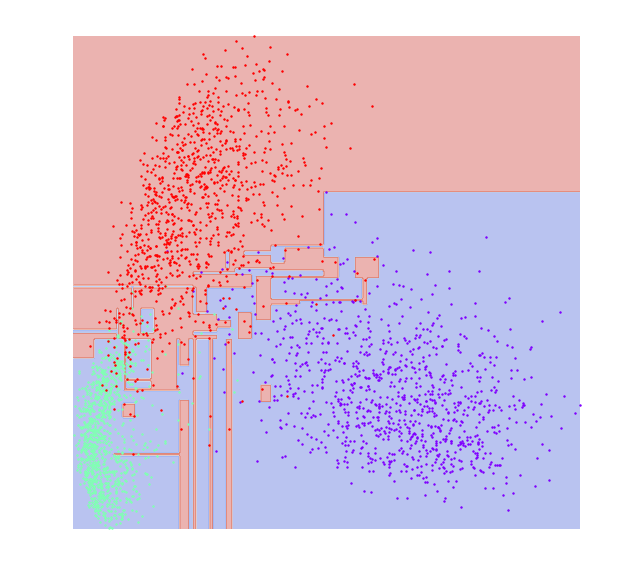

In [178]:
Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(10,10))
axarr.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.coolwarm)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    plt.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count],s=2)
    count+=1
plt.axis('off')

In [179]:
np.sum(blob_tree.predict(x_test) == y_test)/x_test.shape[0]

0.94603425559947296

In [182]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
bag = bagging(clf,10)
bag.fit(x,y)
np.sum(bag.predict(x_test) == y_test)/x_test.shape[0]

0.65085638998682482

(-1209.2569085909126,
 2513.346184378825,
 -1089.1928585935523,
 1762.0421986475903)

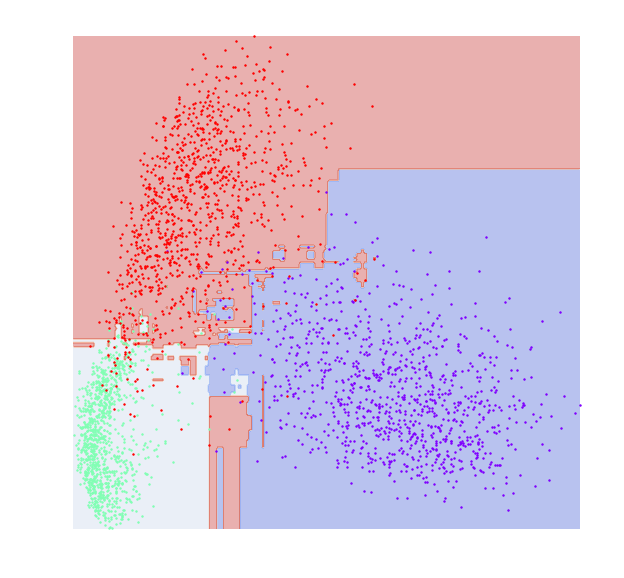

In [183]:
Z = bag.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(10,10))
axarr.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.coolwarm)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    plt.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count],s=2)
    count+=1
plt.axis('off')

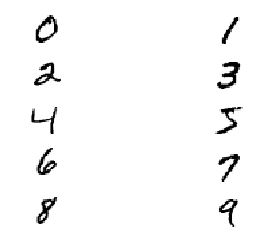

In [139]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(mnist.data[(mnist.target ==i)][0].reshape(28,28),cmap='Greys')
    plt.axis('off')

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 7.,  7.,  7., ...,  7.,  7.,  7.],
       [ 7.,  7.,  7., ...,  7.,  7.,  7.],
       [ 7.,  7.,  7., ...,  7.,  7.,  7.]])